# Report: Enhancing Oil and Gas Well Trading through Data-Driven Analysis

a. Breakdown of the Business Problem:
# 1. Introduction

In this report, we analyze a business problem faced by an Oil and Gas trading company specializing in the trading of production rights for Oil/Gas wells in the US. The company's current approach relies on experts manually creating 'type curves' to forecast the future production of similar wells. However, to enhance decision-making and trading strategies, there's a need to leverage the wealth of available data more effectively.

# 2. Problem Statement

The primary challenge facing the company is the reliance on manual methods for forecasting future production. While expert-driven type curves offer insights, they are limited in their scalability, subjectivity, and potential inefficiencies. The business requires a data-driven solution that utilizes the vast amount of available data to optimize decision-making and trading strategies.

# 3. Objective
 
The aim of this research on harnessing the power of the vast amount of data available to oil company. The goal is to make better-informed trading decisions. The research provieds a solution that can aid their experts in this decision-making process.

# 4. Assumptions made, data quality and availability constraints
   
   It is assumed that the historical production data, well characteristics, and market trends are consistent and reliable. Inconsistent or incomplete data may lead to inaccuracies in the forecasting models. The assumption of stationarity is made regarding the underlying production processes of the Oil/Gas wells. This implies that the statistical properties of the production data remain constant over time, allowing for the application of predictive modeling techniques. The analysis assumes a certain level of market stability and continuity in trading conditions. Sudden shifts in market dynamics, regulatory changes, or geopolitical events may impact trading strategies and forecasting accuracy.
   For the data, there may be limitations in the completeness of the available data, particularly regarding historical production records, well characteristics, and environmental factors. Missing or incomplete data can affect the quality and reliability of the forecasting models. The accuracy of the available data sources, including production records and well characteristics, may vary. Data  inconsistencies could introduce biases and uncertainties into the analysis.

# Detailed analysis
    
   The first step is to import the libaries. 

## Import necesary libraies 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy.optimize import curve_fit

## Import data 
Import the data, form a dataframe using Pandas, transform the date column to datetime format, and define both the time and the production rate. The data contains 514 rows and two columns. The first column is the month of production and the second column is the number of barrels produced on the specific month. 

In [2]:
filepath = './Assignment data/MCRFPNM1m.xls'

# load data
df = pd.read_excel(filepath,sheet_name="Data 1", skiprows= 2)

# rename the columns 
df.columns= ["Date", "Barrels"]

#df=df.loc[(df['Date'] >= '2015-06-15')]

t = df['Date']
q = df['Barrels']

# display the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     514 non-null    datetime64[ns]
 1   Barrels  514 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.2 KB


## Descriptive statistics
The table below shows a summary of statistics of the barrels produced by New Mexico since 1981. The average production per month is 10574.149805 with a standard deviation of 11323.718926. The minimum production  recorded is  4602.000000 and the maximum production recorded is 57037.00. Most of the production is below the 75 percentile. 

In [3]:
q.describe()

count      514.000000
mean     10574.149805
std      11323.718926
min       4602.000000
25%       5498.250000
50%       5902.500000
75%       7882.000000
max      57037.000000
Name: Barrels, dtype: float64

## Visualize the data 
The line plot shows an exponential increase in production since 1981. The plot shows a significant increase from 2010 onwards. 

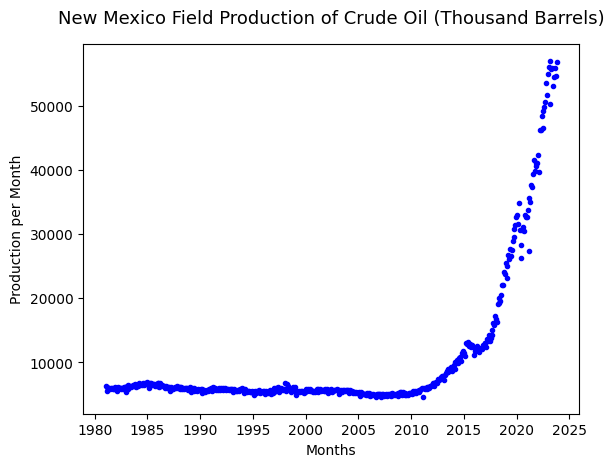

In [4]:
plt.plot(t,q, '.', color='blue')
plt.title('New Mexico Field Production of Crude Oil (Thousand Barrels)', size=13, pad=15)
plt.xlabel('Months')
plt.ylabel('Production per Month')
plt.show()

The histogram shows that the data is strongly skewed to the right.

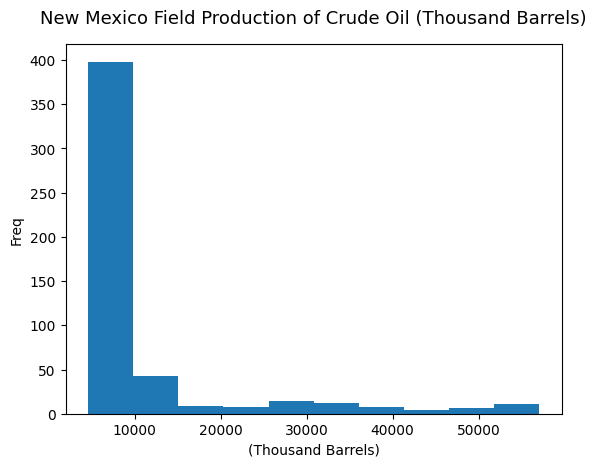

In [5]:
plt.hist(q)
plt.title('New Mexico Field Production of Crude Oil (Thousand Barrels)', size=13, pad=15)
plt.ylabel('Freq')
plt.xlabel('(Thousand Barrels)')
plt.show()


For this analysis we will fit incline curve analysis, also known as decline curve analysis for increasing production, is a technique used to forecast the future performance of oil and gas wells. This method involves fitting a decline curve to historical production data and extrapolating future production based on the observed decline behavior.
We first define the sample production data, where months represent the time in months, and production represents the corresponding production values. Then we define an exponential decline curve model function (exponential_decline) which represents the decline curve equation. We use curve_fit from scipy.optimize to fit the exponential decline curve to the production data. The popt_exp variable contains the optimized parameters for the decline curve model. Finally We generate forecasted production data using the fitted decline curve model for the next 600 months.

In [6]:

# Sample production data
months = np.array(range(1, len(df)+1))
production = q

# Define decline curve models
def exponential_decline(x, qi, di):
    return qi * np.exp(-di * x)

# Fit exponential decline curve to data
popt_exp, pcov_exp = curve_fit(exponential_decline, months, production)

# Generate forecasted production data
forecast_months = np.arange(1, 600)  # Forecast for 24 months
forecast_production = exponential_decline(forecast_months, *popt_exp)



/tmp/ipykernel_249413/1949065930.py:7: RuntimeWarning: overflow encountered in exp
  return qi * np.exp(-di * x)


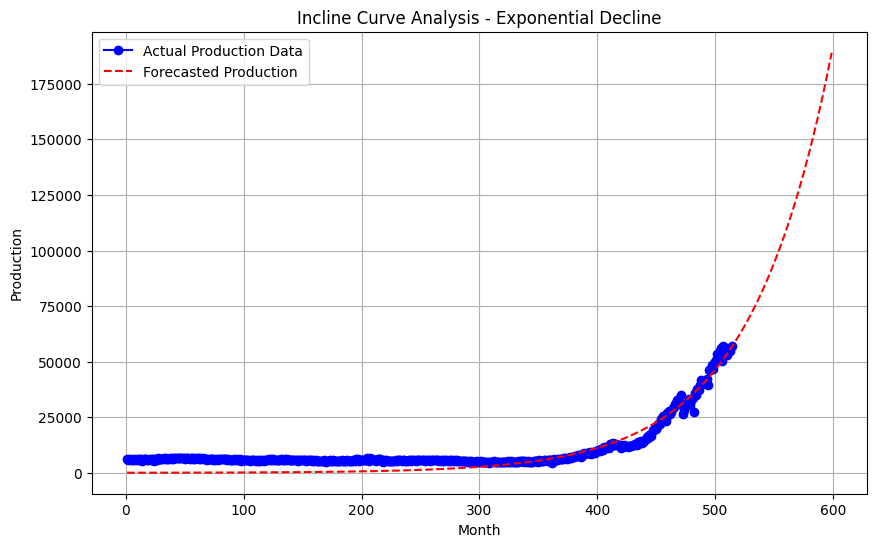

In [7]:
# Plot production data and forecast
plt.figure(figsize=(10, 6))
plt.plot(months, production, 'bo-', label='Actual Production Data')
plt.plot(forecast_months, forecast_production, 'r--', label='Forecasted Production')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Incline Curve Analysis - Exponential Decline')
plt.grid(True)
plt.legend()
plt.show()



The plot indicates that the production of oil and gas from new mexico will continue to increase in the comming months. We obtain the initial production rate equals 37.90  per day, the initial decline rate equals -0.014. 

In [8]:
# Print model parameters
qi, di = popt_exp
print(f"Initial production rate (qi): {qi}")
print(f"Decline rate (di): {di}")


Initial production rate (qi): 37.90832350164955
Decline rate (di): -0.014214025647372671


# 5. Findings and recommendations

## Findings
The analysis indicates a forecasted increase in production in New Mexico's oil and gas sector. This prediction is based on various factors such as well characteristics, historical production data, market trends, and environmental conditions. The forecasted increase suggests potential growth opportunities and favorable market conditions in the region. 

## Recommendations 
Given the anticipated growth in production, stakeholders should prioritize investments in infrastructure development to support increased drilling activity and production volumes. Collaborative efforts between industry players, government agencies, and private investors are crucial to addressing infrastructure gaps and enhancing operational efficiency.
It would be useful to conduct further analysis to understand the factors contributing to this predicted increase. This could include geological factors, technological advancements, regulatory changes, etc. 


In [29]:
def print_pyramid(numbers):
    n = len(numbers)
    index = 0

    # Calculate the number of rows
    rows = int((-1 + (1 + 8 * n) ** 0.5) / 2)

    for i in range(1, rows + 1):
        # Print leading spaces
        print(' ' * (rows - i), end='')

        # Print numbers of the current row
        for j in range(i):
            print(numbers[index], end=' ')
            index += 1

        # Move to the next line
        print()

# Test the function
numbers = [1, 2, 3, 4, 5, 6]
print_pyramid(numbers)


  1 
 2 3 
4 5 6 


In [66]:
def print_pyramid(numbers):
    n = len(numbers)
    index = 0
    right_most_elements = []

    # Calculate the number of rows
    rows = int((-1 + (1 + 8 * n) ** 0.5) / 2)

    for i in range(1, rows + 1):
        

        # Print numbers of the current row
        for j in range(i):
            if j == i - 1:
                right_most_elements.append(numbers[index])
            index += 1

    return right_most_elements

In [1]:
def decode(message_file):

    def print_pyramid(numbers):
        n = len(numbers)
        index = 0
        right_most_elements = []
    
        # Calculate the number of rows
        rows = int((-1 + (1 + 8 * n) ** 0.5) / 2)
    
        for i in range(1, rows + 1):
            
    
            # Print numbers of the current row
            for j in range(i):
                if j == i - 1:
                    right_most_elements.append(numbers[index])
                index += 1
    
        return right_most_elements

    ############# read files ######
     # Open the file in read mode
    with open(message_file, 'r') as file:
        # Read all lines from the file
        lines = file.readlines()
        
        # Initialize an empty list to store the words
        words = []
        numbers= []
        word_dic= {}
        
        # Initialize a counter for the pyramid line end numbers
        counter = 0
        # Loop over the range from 1 to the number of lines in the file
        for line in lines:
            number, word = line.strip().split(' ', 1)
            number = int(number)
            word_dic[number]=word
            numbers.append(number)
        numbers.sort()
        last_digt= print_pyramid(numbers)
        return ' '.join({k: word_dic[k] for k in last_digt}.values())

    

In [2]:
print(decode('coding_qual_input.txt'))

down dont nine lot work silver east duck done tone bit stop sun deal huge moment poem hold make like possible clock of bought


In [53]:
 # Open the file in read mode
with open('coding_qual_input.txt', 'r') as file:
    # Read all lines from the file
    lines = file.readlines()
    
    # Initialize an empty list to store the words
    words = []
    numbers= []
    word_dic= {}
    
    # Initialize a counter for the pyramid line end numbers
    counter = 0
    # Loop over the range from 1 to the number of lines in the file
    for line in lines:
        number, word = line.strip().split(' ', 1)
        number = int(number)
        word_dic[number]=word
        numbers.append(number)
    numbers.sort()
    last_digt= print_pyramid(numbers)
    return {k: word_dic[k] for k in last_digt}

In [58]:
#print_pyramid(numbers)
#numbers.sort()
word_dic
{k: word_dic[k] for k in last_digt}

{1: 'down',
 3: 'dont',
 6: 'nine',
 10: 'lot',
 15: 'work',
 21: 'silver',
 28: 'east',
 36: 'duck',
 45: 'done',
 55: 'tone',
 66: 'bit',
 78: 'stop',
 91: 'sun',
 105: 'deal',
 120: 'huge',
 136: 'moment',
 153: 'poem',
 171: 'hold',
 190: 'make',
 210: 'like',
 231: 'possible',
 253: 'clock',
 276: 'of',
 300: 'bought'}

In [59]:
def print_pyramid(numbers):
    n = len(numbers)
    index = 0
    right_most_elements = []

    # Calculate the number of rows
    rows = int((-1 + (1 + 8 * n) ** 0.5) / 2)

    for i in range(1, rows + 1):
        

        # Print numbers of the current row
        for j in range(i):
            if j == i - 1:
                right_most_elements.append(numbers[index])
            index += 1

    return right_most_elements

# Test the function
numbers2 = [1, 2, 3, 4, 5, 6]
right_most_elements = print_pyramid(numbers)
print("Right most elements of each row: ", right_most_elements)


Right most elements of each row:  [1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91, 105, 120, 136, 153, 171, 190, 210, 231, 253, 276, 300]
